In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from razdel import sentenize, tokenize
import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from laserembeddings import Laser
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
from slovnet import Morph
from navec import Navec

In [2]:
model_checkpoint = 'cointegrated/rubert-base-cased-nli-threeway'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
if torch.cuda.is_available():
    model.cuda()

H:\Anaconda\envs\transformers\lib\site-packages\transformers\configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "


In [3]:
laser = Laser()

In [4]:
SentimentTokenizer = RegexTokenizer()
SentimentModel = FastTextSocialNetworkModel(tokenizer=SentimentTokenizer)

In [5]:
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')
morph = Morph.load('slovnet_morph_news_v1.tar', batch_size=4)
morph.navec(navec)

Morph(
    infer=MorphInfer(
        model=Morph(
            emb=WordShapeEmbedding(
                word=NavecEmbedding(
                    id='news_v1_1B_250K_300d_100q',
                    indexes=Weight(
                        shape=[250002,
                         100],
                        dtype='uint8',
                        array=array([[176, 222, 248, ..., 244, 183, 191],
                               [215, 200, 168, ..., 120, 217,  21],
                               [ 83, 174,  54, ..., 106,  88, 251],
                               ...,
                               [133, 125, 123, ..., 124,  94,  24],
                               [183,  49, 180, ..., 151, 167,  68],
                               [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
                    ),
                    codes=Weight(
                        shape=[100,
                         256,
                         3],
                        dtype='float32',
                       

In [6]:
#text = "Фестиваль национальных культур – самое яркое событие осени для студентов Технологического университета им. А.А. Леонова. И в этом году у него первый мини-юбилей! Пять лет как фестиваль является традиционным праздником нашего вуза и на несколько недель захватывает внимание студентов. Они активно и с энтузиазмом готовят свои выступления, продумывают сценарии и репетируют, оттачивая своё мастерство. Отличительными чертами Фестиваля национальных культур за годы его проведения стали визитные карточки разных государств, творческие номера и дегустация блюд национальной кухни. Часто именно иностранные студенты представляют свою Родину, но к процессу обязательно подключаются и другие ребята. Благодаря такому подходу студенты ещё на этапе подготовки к фестивалю погружаются в национальную культуру многих стран и делятся друг с другом своим опытом. В связи с эпидемиологической ситуацией в этом году не получилось накрыть стол с национальными блюдами, но это не помешало празднику раскрыться во всей красе через яркие информативные презентации и эффектные выступления студентов. Мероприятие прошло с соблюдением всех необходимых мер безопасности, вход осуществлялся по QR-кодам, а все желающие могли присоединиться к трансляции онлайн. В конце участники были награждены грамотами. Проректор по внеучебной и воспитательной работе Вера Минакова поблагодарила всех ребят за тот вклад, что они внесли в организацию такого яркого праздника, и отметила, что гости зарядились невероятной энергией от выступающих."
#text = "Минтранс предложил оснастить автомобили сервисов такси устройствами для контроля сонливости водителей. Об этом говорится в проекте федерального закона «О такси», размещённого на сайте проектов нормативно-правовых актов. Законопроект предусматривает, чтобы кузов такси окрашивали по схеме из квадратов контрастных цветов в шахматном порядке. При этом цветовая гамма должна «соответствовать стандартам региона». На крыше автомобиля необходимо размещать опознавательный фонарь оранжевого цвета. Если проект примут, он вступит в силу 1 сентября 2022 года. Действующие ПДД разрешают водителю находиться за рулём суммарно не более десяти часов. Контролируют это с помощью тахографов. Штраф для нарушителей — до 2,5 тысяч рублей."
#text = "Сегодня в Технологическом университете им. А.А. Леонова состоялась встреча представителей компании «Первый Бит» с преподавателями вуза и студентами IT-направлений подготовки. Эта встреча – не первая. Ранее студенты уже познакомились с деятельностью компании «Первый Бит». Теперь же молодые люди узнали о возможностях трудоустройства и прохождения практики в организации. Компания заинтересована в молодых и перспективных сотрудниках. Поэтому специально для студентов её руководство разработало особые условия трудоустройства. Ребятам предлагается устроиться на работу в «Первый Бит» на вакансии с частичной занятостью, что позволит совмещать трудовую деятельность с учёбой. При успешном трудоустройстве, студенты пройдут в компании необходимое оплачиваемое обучение. Являясь сотрудниками «Первого Бита», ребята также смогут работать над своими курсовыми и дипломными проектами по тематике компании под руководством её специалистов. Многих из присутствовавших на встрече студентов заинтересовали такие перспективы, и представители «Первого Бита» сразу же предложили им пройти необходимое для трудоустройства тестирование. А остальных ребят, кто ещё не принял решение, компания с нетерпением будет ждать в своём офисе в Москве. Напомним, компания «Первый Бит» давно известна на рынке информационных услуг по автоматизации процессов учёта и управления на базе 1С. Партнёрами компании являются крупнейшие корпорации и предприятия России и ближнего зарубежья."
#text = "Разработчик Pokemon Go привлёк $300 млн для развития платформы дополненной реальности на основе карты мира. За два года оценка компании выросла с $4 млрд до $9 млрд. Niantic привлекла инвестиции от хедж-фонда Coatue. Она потратит деньги на развитие уже запущенных игр и новые приложения, расширение платформы для разработчиков Lightship и развитие «метавселенной» на основе трехмерной карты мира. Компания запустила платформу для разработчиков Lightship в октябре 2021 года. Через неё можно пользоваться инструментами для разработки и запуска приложений для дополненной реальности. Тогда же компания объявила о запуске фонда на $20 млрд для AR-стартапов. В 2016 году Niantic запустила игру в дополненной реальности Pokemon Go. За пять выручка от игры превысила $5 млрд, а общее количество загрузок — 632 млн, по данным SensorTower. Компания работает над приложением с дополненной реальностью Indgress, а в январе 2022 года закроет Harry Potter: Wizards Unite. Niantic была частью Alphabet, но отделилась после реструктуризации компании в 2015 году. В 2019 году стартап привлёк $245 млн с оценкой в $4 млрд."

# https://zen.yandex.ru/media/id/5c4825ee78e51100ad620ff3/zemlia-pokryta-kupolom-5d1be15229063700add517a8?&
#text = "Официальная наука не отрицает, что на раннем этапе развития планеты, наша земля могла быть покрыта каким то куполом. В том числе, коркой льда, лёд мог растаять и упасть за землю в форме осадков, образуя глобальный потоп, тем временем исследователи утверждают, купол над нами есть и сейчас. Очень многие эзотерики считают, что верхняя крышка мира является эфиром, то есть тонкий газ, который по сути то существует, то нет. Но другая половина сторонников считает, что купол алмазный, тк выполнен из очень плотного углерода. Основываясь на то, что углерод, при очень высоких температурах и большом давлении, формирует как раз-алмаз. Как же сохраняет форму алмазный купол земли? Одна молекула кислорода в разных уровнях пространства, представляет собой -воду, кислород и озон. Кислород которым мы дышим на земле, поднимаясь все выше, соединяется с элементами атмосферы от водорода до озона, при минусовой температуре в космосе, он может находиться только в виде льда, но во что кислород может трансформироваться дальше? Озон там находится в жидком состоянии, потому что при такой температуре он может находиться только в жидком состоянии, соответсвенно дальше уже поднимается 4 молекулы кислорода, а это уже практически твёрдое тело, и вот это то самое что является основой и что держит сверху крышку нашего купола. И вот какие ещё аргументы имеют сторонники алмазно-водЯного купола- промышленные разработки человечества, вырубка лесов, Приводит к снижению уровня кислорода в атмосфере, образуется углекислый газ, который поднимаясь вверх- разрушает оболочку купола. Слои кислорода начинают двигаться, природа чтобы компенсировать это начинает топить ледники, Но, это мы действительно наблюдаем сейчас, только нам говорят это глобальное потепление. Соответсвенно мы видим что? Небо начинает падать, как в библии сказано, что небо падает на землю, сейчас все люди чувствуют пониженное давление, у нас идут сбои в электротехнических приборах, почему ? Потому что слои кислорода начали двигаться. Процесс таяния ледников, абсолютно химически обоснованный и неизбежный, исследования учёных подтверждают, что ледники тают с огромной скоростью, Что же происходит с куполом? Он начинает падать, его опора разрушается, И это, ещё одно объяснение -появление загадочных облаков И звуков в небе. Если теоретически, земля окружена куполом из твёрдой алмазной структуры, то он может скрипеть и ломаться, это возможно и есть тот самый небесный скрежет. Но, что ещё более невероятно, похоже его кто-то чинит. Вспомните огромное количество роликов, будто кто то латает дыру прячась за облаками."

text = '2 ноября 2021 года сенатор Рон Джонсон организовал круглый стол посвященный вопросу модных процедур и их обязательного внедрения. На мероприятии участвовали эксперты (врачи, учёные и адвокаты мирового уровня), а также пострадавшие от модной процедуры. Хотя я не большой любитель длинных видеозаписей, я считаю, что сенатору удалось организовать невероятно качественное мероприятие. Каждый участник прочитал чёткий и лаконичный доклад. Кроме одного короткого выступления, которое было слишком перегружено научной терминологией, там нет ничего лишнего. Всё чётко и по делу, и никакой воды. Несмотря на длину этого мероприятия (около 3,5 часов) я думаю, что его стоит посмотреть всем. Особенно тем, кто сомневается, или чьи друзья и родственники сомневаются или думают пройти модную процедуру. Но даже если вы не сомневаетесь, и всё решили, его всё равно стоит посмотреть. Например, чтобы из выступлений двух участниц клинических испытаний узнать, как именно фармкомпании регистрируют побочные эффекты, и как получается, что эти процедуры "безопасны". Или чтобы выступления адвоката, который специализируется на этой теме, узнать, как именно органы здравоохранения отмахиваются от сотен тысяч пострадавших. Мероприятие хоть и сосредотачивается на модной процедуре, но имеет отношение к исследованиям во всех областях медицины. Поскольку я считаю, что это самое качественное видео, которое существует на модную тему на данный момент, я предложил организовать коллективный перевод, и на это предложение откликнулись более 20 переводчиков-волонтеров, которые потратили немало времени, чтобы сделать быстрый и качественный перевод этого мероприятия. Огромная им благодарность! Youtube удалил оригинальную запись этого круглого стола под совершенно бессмысленным предлогом. Видеозапись с переводом выложена на Рамбл, и чуть позже загрузится и сюда. Поделитесь этим видео со знакомыми, и перешлите его вашим любимым пропроцедурным блогерам, особенно врачам. Могу гарантировать, что парировать всю эту информацию им будет просто нечем.'

In [7]:
sentences = []
chunk = []
for sent in sentenize(text):
    sentence = {}
    sentence['Sentence'] = sent.text
    sentence['Span'] = (sent.start, sent.stop)
    sentences.append(sentence)
    tokens = [_.text for _ in tokenize(sent.text)]
    chunk.append(tokens)
result = pd.DataFrame(sentences)

In [8]:
result

,Sentence,Span
0,2 ноября 2021 года сенатор Рон Джонсон организ...,"(0, 129)"
1,"На мероприятии участвовали эксперты (врачи, уч...","(130, 251)"
2,Хотя я не большой любитель длинных видеозаписе...,"(252, 381)"
3,Каждый участник прочитал чёткий и лаконичный д...,"(382, 434)"
4,"Кроме одного короткого выступления, которое бы...","(435, 550)"
5,"Всё чётко и по делу, и никакой воды.","(551, 587)"
6,"Несмотря на длину этого мероприятия (около 3,5...","(588, 681)"
7,"Особенно тем, кто сомневается, или чьи друзья ...","(682, 790)"
8,"Но даже если вы не сомневаетесь, и всё решили,...","(791, 869)"
9,"Например, чтобы из выступлений двух участниц к...","(870, 1048)"


In [9]:
columns = ['Sentence', 'Prev text', 'Entailment', 'Contradiction', 'Neutrality']
result2 = pd.DataFrame(columns=columns)

for sentence in tqdm(sentences):
    prev_text = ''
    for prev_sentence in sentences[:sentences.index(sentence)]:
        prev_text += prev_sentence['Sentence']
    
    with torch.inference_mode():
        out = model(**tokenizer(prev_text, sentence['Sentence'], return_tensors='pt', truncation=True).to(model.device))
        proba = torch.softmax(out.logits, -1).cpu().numpy()[0]
    analysis = {v: proba[k] for k, v in model.config.id2label.items()}
    
    new_df = pd.DataFrame([
        [sentence['Sentence'], 
         prev_text, 
         analysis['entailment'], 
         analysis['contradiction'], 
         analysis['neutral']
        ]], columns = columns)
    result2 = result2.append(new_df)

result2 = result2.reset_index(drop=True)

100%|██████████| 18/18 [00:32<00:00,  1.82s/it]


In [10]:
del result2['Prev text']

In [11]:
result2['MaxLogic'] = result2[['Entailment','Contradiction','Neutrality']].idxmax(axis=1)

In [12]:
sentiments = SentimentModel.predict(result['Sentence'])

In [13]:
result2 = result2.join(pd.DataFrame(sentiments))

In [14]:
result2['MaxSentiment'] = result2[['neutral', 'skip','negative','positive', 'speech']].idxmax(axis=1)
result2['MaxSentiment_no_neutral'] = result2[['skip','negative','positive', 'speech']].idxmax(axis=1)

In [15]:
result2

,Sentence,Entailment,Contradiction,Neutrality,MaxLogic,neutral,skip,positive,negative,speech,MaxSentiment,MaxSentiment_no_neutral
0,2 ноября 2021 года сенатор Рон Джонсон организ...,0.000786,0.009293,0.989921,Neutrality,0.914911,0.039649,0.034110,0.027595,0.006108,neutral,skip
1,"На мероприятии участвовали эксперты (врачи, уч...",0.003505,0.007161,0.989334,Neutrality,0.348655,0.055015,0.160276,0.300756,0.007826,neutral,negative
2,Хотя я не большой любитель длинных видеозаписе...,0.001231,0.001719,0.997051,Neutrality,0.749097,0.026769,0.206904,0.051855,0.001998,neutral,positive
3,Каждый участник прочитал чёткий и лаконичный д...,0.002999,0.032669,0.964332,Neutrality,0.679189,0.014967,0.095359,0.206904,0.000698,neutral,negative
4,"Кроме одного короткого выступления, которое бы...",0.172796,0.021560,0.805644,Neutrality,0.507822,0.039649,0.069552,0.217348,0.016413,neutral,negative
5,"Всё чётко и по делу, и никакой воды.",0.376818,0.083765,0.539417,Neutrality,0.160276,0.129413,0.136618,0.453272,0.000921,negative,negative
6,"Несмотря на длину этого мероприятия (около 3,5...",0.003938,0.009304,0.986759,Neutrality,0.665421,0.019729,0.098089,0.140346,0.000656,neutral,negative
7,"Особенно тем, кто сомневается, или чьи друзья ...",0.205565,0.127663,0.666772,Neutrality,0.851963,0.136618,0.022296,0.078088,0.000010,neutral,skip
8,"Но даже если вы не сомневаетесь, и всё решили,...",0.889759,0.022070,0.088171,Entailment,0.577505,0.122533,0.092698,0.125933,0.000345,neutral,negative
9,"Например, чтобы из выступлений двух участниц к...",0.006444,0.831287,0.162269,Contradiction,0.651365,0.122533,0.021625,0.256842,0.030225,neutral,negative


In [16]:
words_statistic = []

for markup in morph.map(chunk):
    words = []
    for token in markup.tokens:
        words.append({'word':token.text, 'tag':token.tag})
    df_words = pd.DataFrame(words)
    df_words['part'] = df_words['tag'].str.replace('\|.*', '', regex=True)
    del df_words['word']
    del df_words['tag']
    df_words['count'] = 1
    words_statistic.append(df_words.groupby('part').sum()['count'].to_dict())

result3 = pd.DataFrame(words_statistic).fillna(0)
result3

,ADJ,CCONJ,NOUN,PRON,PROPN,PUNCT,VERB,ADP,ADV,PART,SCONJ,DET,AUX,NUM
0,6.0,1.0,6.0,1.0,2.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,7.0,0.0,0.0,5,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,4.0,2.0,0.0,3,3.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0
3,2.0,1.0,2.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,0.0,2.0,2.0,0.0,3,2.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0
5,0.0,1.0,2.0,1.0,0.0,2,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
6,0.0,0.0,3.0,3.0,0.0,4,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0
7,1.0,3.0,3.0,1.0,0.0,3,4.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
8,1.0,2.0,0.0,4.0,0.0,3,4.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
9,3.0,1.0,6.0,0.0,0.0,7,3.0,1.0,3.0,1.0,2.0,1.0,0.0,1.0


In [17]:
pca_stat = PCA(n_components=0.8, svd_solver = 'full')
pca_stat_result = pca_stat.fit_transform(result3)

In [18]:
stat_df = pd.DataFrame(pca_stat_result[:,:pca_stat.n_components_])
stat_df

,0,1,2
0,1.458302,-2.446699,4.661337
1,2.604081,-2.548491,-1.499505
2,0.679514,0.897676,1.268796
3,-3.168503,-0.837033,1.440658
4,-0.989346,0.935849,1.217500
5,-3.458892,-0.521690,-0.912579
6,-0.196696,1.988823,-1.737012
7,-0.588395,1.198092,-0.804153
8,-2.160087,4.828644,0.306624
9,3.941062,-0.443387,-1.753088


In [19]:
stat_scaler = MinMaxScaler()
scaled_stat_df = pd.DataFrame(stat_scaler.fit_transform(stat_df))
scaled_stat_df

,0,1,2
0,0.403122,0.022190,1.000000
1,0.480404,0.008509,0.175594
2,0.350593,0.471676,0.546031
3,0.091046,0.238530,0.569029
4,0.238029,0.476806,0.539167
5,0.071459,0.280912,0.254133
6,0.291493,0.618327,0.143813
7,0.265073,0.512052,0.268642
8,0.159063,1.000000,0.417279
9,0.570583,0.291436,0.141662


In [20]:
for col in scaled_stat_df.columns[:pca_stat.n_components_]:
    scaled_stat_df[str(col)+'_new'] = abs(scaled_stat_df[col] - 0.5) < 0.45
scaled_stat_df.columns = ['Stat1_original', 'Stat2_original', 'Stat3_original', 'Stat1', 'Stat2', 'Stat3']
print(scaled_stat_df)

    Stat1_original  Stat2_original  Stat3_original  Stat1  Stat2  Stat3
0         0.403122        0.022190        1.000000   True   True  False
1         0.480404        0.008509        0.175594   True   True   True
2         0.350593        0.471676        0.546031   True   True   True
3         0.091046        0.238530        0.569029   True   True   True
4         0.238029        0.476806        0.539167   True   True   True
5         0.071459        0.280912        0.254133   True   True   True
6         0.291493        0.618327        0.143813   True   True   True
7         0.265073        0.512052        0.268642   True   True   True
8         0.159063        1.000000        0.417279   True  False   True
9         0.570583        0.291436        0.141662   True   True   True
10        0.486799        0.104393        0.000000   True   True   True
11        0.331528        0.000000        0.193678   True   True   True
12        1.000000        0.698250        0.573064  False   True

In [21]:
result2 = result2.join(scaled_stat_df)
result2

,Sentence,Entailment,Contradiction,Neutrality,MaxLogic,neutral,skip,positive,negative,speech,MaxSentiment,MaxSentiment_no_neutral,Stat1_original,Stat2_original,Stat3_original,Stat1,Stat2,Stat3
0,2 ноября 2021 года сенатор Рон Джонсон организ...,0.000786,0.009293,0.989921,Neutrality,0.914911,0.039649,0.034110,0.027595,0.006108,neutral,skip,0.403122,0.022190,1.000000,True,True,False
1,"На мероприятии участвовали эксперты (врачи, уч...",0.003505,0.007161,0.989334,Neutrality,0.348655,0.055015,0.160276,0.300756,0.007826,neutral,negative,0.480404,0.008509,0.175594,True,True,True
2,Хотя я не большой любитель длинных видеозаписе...,0.001231,0.001719,0.997051,Neutrality,0.749097,0.026769,0.206904,0.051855,0.001998,neutral,positive,0.350593,0.471676,0.546031,True,True,True
3,Каждый участник прочитал чёткий и лаконичный д...,0.002999,0.032669,0.964332,Neutrality,0.679189,0.014967,0.095359,0.206904,0.000698,neutral,negative,0.091046,0.238530,0.569029,True,True,True
4,"Кроме одного короткого выступления, которое бы...",0.172796,0.021560,0.805644,Neutrality,0.507822,0.039649,0.069552,0.217348,0.016413,neutral,negative,0.238029,0.476806,0.539167,True,True,True
5,"Всё чётко и по делу, и никакой воды.",0.376818,0.083765,0.539417,Neutrality,0.160276,0.129413,0.136618,0.453272,0.000921,negative,negative,0.071459,0.280912,0.254133,True,True,True
6,"Несмотря на длину этого мероприятия (около 3,5...",0.003938,0.009304,0.986759,Neutrality,0.665421,0.019729,0.098089,0.140346,0.000656,neutral,negative,0.291493,0.618327,0.143813,True,True,True
7,"Особенно тем, кто сомневается, или чьи друзья ...",0.205565,0.127663,0.666772,Neutrality,0.851963,0.136618,0.022296,0.078088,0.000010,neutral,skip,0.265073,0.512052,0.268642,True,True,True
8,"Но даже если вы не сомневаетесь, и всё решили,...",0.889759,0.022070,0.088171,Entailment,0.577505,0.122533,0.092698,0.125933,0.000345,neutral,negative,0.159063,1.000000,0.417279,True,False,True
9,"Например, чтобы из выступлений двух участниц к...",0.006444,0.831287,0.162269,Contradiction,0.651365,0.122533,0.021625,0.256842,0.030225,neutral,negative,0.570583,0.291436,0.141662,True,True,True


In [22]:
embeddings = laser.embed_sentences(result['Sentence'], lang='ru')

In [23]:
pca=PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)
pca_df = pd.DataFrame(pca_result, columns=['x', 'y'])

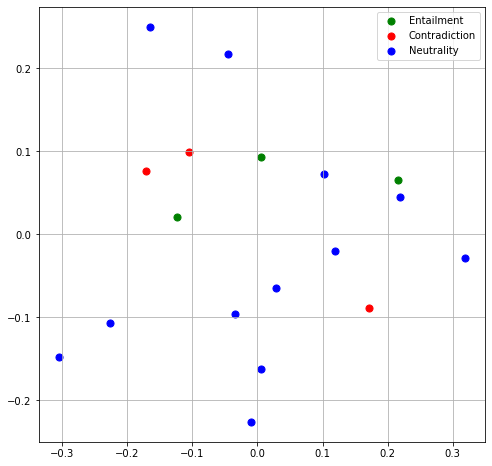

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['Entailment', 'Contradiction', 'Neutrality']
colors = ['g', 'r', 'b']
markers = ['o', 'o', 'o']

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = result2['MaxLogic'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'x']
               , pca_df.loc[indicesToKeep, 'y']
               , c = color
               , s = 50
               , marker = marker
              )
ax.legend(targets)
ax.grid()

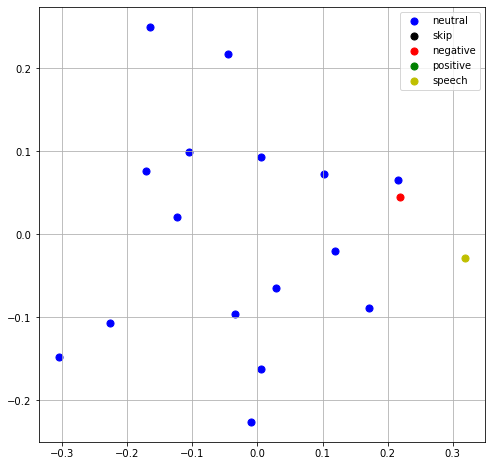

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['neutral', 'skip','negative','positive', 'speech']
colors = ['b', 'k', 'r', 'g', 'y']
markers = ['o', 'o', 'o', 'o', 'o']

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = result2['MaxSentiment'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'x']
               , pca_df.loc[indicesToKeep, 'y']
               , c = color
               , s = 50
               , marker = marker
              )
ax.legend(targets)
ax.grid()

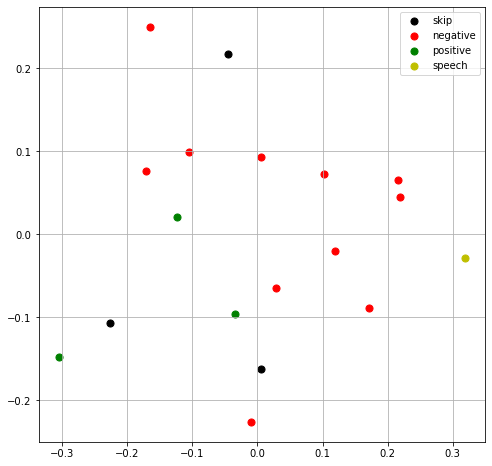

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['skip','negative','positive', 'speech']
colors = ['k', 'r', 'g', 'y']
markers = ['o', 'o', 'o', 'o']

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = result2['MaxSentiment_no_neutral'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'x']
               , pca_df.loc[indicesToKeep, 'y']
               , c = color
               , s = 50
               , marker = marker
              )
ax.legend(targets)
ax.grid()

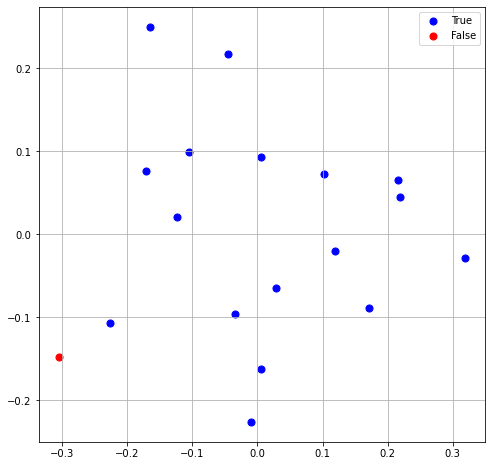

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = [True, False]
colors = ['b', 'r']
markers = ['o', 'o']

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = result2['Stat1'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'x']
               , pca_df.loc[indicesToKeep, 'y']
               , c = color
               , s = 50
               , marker = marker
              )
ax.legend(targets)
ax.grid()

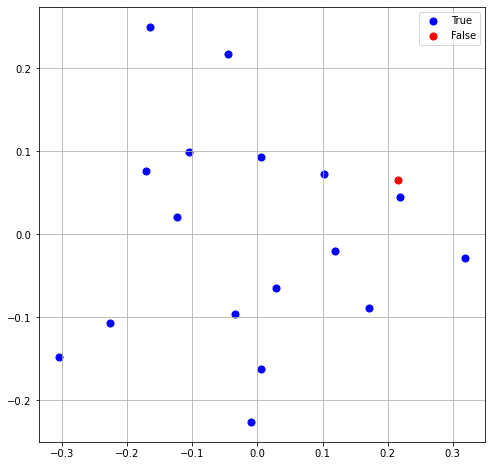

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = [True, False]
colors = ['b', 'r']
markers = ['o', 'o']

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = result2['Stat2'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'x']
               , pca_df.loc[indicesToKeep, 'y']
               , c = color
               , s = 50
               , marker = marker
              )
ax.legend(targets)
ax.grid()

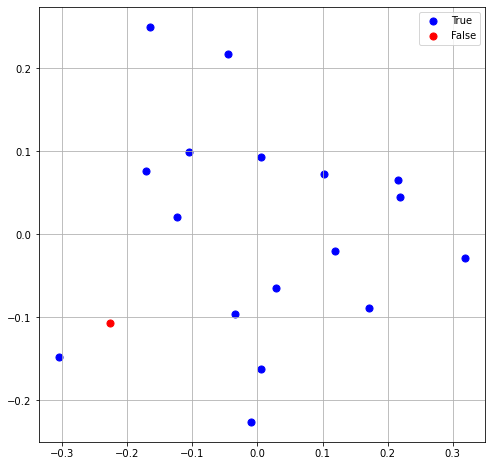

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = [True, False]
colors = ['b', 'r']
markers = ['o', 'o']

for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = result2['Stat3'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'x']
               , pca_df.loc[indicesToKeep, 'y']
               , c = color
               , s = 50
               , marker = marker
              )
ax.legend(targets)
ax.grid()

In [30]:
result2.head()

,Sentence,Entailment,Contradiction,Neutrality,MaxLogic,neutral,skip,positive,negative,speech,MaxSentiment,MaxSentiment_no_neutral,Stat1_original,Stat2_original,Stat3_original,Stat1,Stat2,Stat3
0,2 ноября 2021 года сенатор Рон Джонсон организ...,0.000786,0.009293,0.989921,Neutrality,0.914911,0.039649,0.034110,0.027595,0.006108,neutral,skip,0.403122,0.022190,1.000000,True,True,False
1,"На мероприятии участвовали эксперты (врачи, уч...",0.003505,0.007161,0.989334,Neutrality,0.348655,0.055015,0.160276,0.300756,0.007826,neutral,negative,0.480404,0.008509,0.175594,True,True,True
2,Хотя я не большой любитель длинных видеозаписе...,0.001231,0.001719,0.997051,Neutrality,0.749097,0.026769,0.206904,0.051855,0.001998,neutral,positive,0.350593,0.471676,0.546031,True,True,True
3,Каждый участник прочитал чёткий и лаконичный д...,0.002999,0.032669,0.964332,Neutrality,0.679189,0.014967,0.095359,0.206904,0.000698,neutral,negative,0.091046,0.238530,0.569029,True,True,True
4,"Кроме одного короткого выступления, которое бы...",0.172796,0.021560,0.805644,Neutrality,0.507822,0.039649,0.069552,0.217348,0.016413,neutral,negative,0.238029,0.476806,0.539167,True,True,True


In [31]:
from ruwordnet import RuWordNet
import pymorphy2

In [32]:
wn = RuWordNet()
pma = pymorphy2.MorphAnalyzer()

In [33]:
for sentence in tqdm(result2['Sentence']):
    for token in tokenize(sentence):        
        parsed = pma.parse(token.text)[0]
        try:
            a = wn[parsed.normal_form][0].synset.antonyms[0].title.split(',')[0]
            newtag = frozenset(str(parsed.tag)[str(parsed.tag).find(' ')+1:].split(','))
            b = pma.parse(a)[0].inflect(newtag).word
        except Exception:
            a = []
        if len(a) > 0 and a.find(' ') == -1:
            print(sentence)
            print(token.text, ' ->', b)
            print(sentence.replace(token.text, b))
            print('---')

 28%|██▊       | 5/18 [00:01<00:02,  5.42it/s]

Каждый участник прочитал чёткий и лаконичный доклад.
лаконичный  -> многословный
Каждый участник прочитал чёткий и многословный доклад.
---
Кроме одного короткого выступления, которое было слишком перегружено научной терминологией, там нет ничего лишнего.
короткого  -> подробного
Кроме одного подробного выступления, которое было слишком перегружено научной терминологией, там нет ничего лишнего.
---


 83%|████████▎ | 15/18 [00:02<00:00,  7.72it/s]

Поскольку я считаю, что это самое качественное видео, которое существует на модную тему на данный момент, я предложил организовать коллективный перевод, и на это предложение откликнулись более 20 переводчиков-волонтеров, которые потратили немало времени, чтобы сделать быстрый и качественный перевод этого мероприятия.
быстрый  -> медленный
Поскольку я считаю, что это самое качественное видео, которое существует на модную тему на данный момент, я предложил организовать коллективный перевод, и на это предложение откликнулись более 20 переводчиков-волонтеров, которые потратили немало времени, чтобы сделать медленный и качественный перевод этого мероприятия.
---
Youtube удалил оригинальную запись этого круглого стола под совершенно бессмысленным предлогом.
бессмысленным  -> действенным
Youtube удалил оригинальную запись этого круглого стола под совершенно действенным предлогом.
---


100%|██████████| 18/18 [00:02<00:00,  6.50it/s]

Поделитесь этим видео со знакомыми, и перешлите его вашим любимым пропроцедурным блогерам, особенно врачам.
любимым  -> нелюбимым
Поделитесь этим видео со знакомыми, и перешлите его вашим нелюбимым пропроцедурным блогерам, особенно врачам.
---
Могу гарантировать, что парировать всю эту информацию им будет просто нечем.
информацию  -> незнание
Могу гарантировать, что парировать всю эту незнание им будет просто нечем.
---


In [34]:
columns_to_keep = ['Sentence', 'Entailment', 'Contradiction', 'skip', 'positive', 'negative', 'speech', 'Stat1_original']
result4 = result2[columns_to_keep]
result4.head()

,Sentence,Entailment,Contradiction,skip,positive,negative,speech,Stat1_original
0,2 ноября 2021 года сенатор Рон Джонсон организ...,0.000786,0.009293,0.039649,0.034110,0.027595,0.006108,0.403122
1,"На мероприятии участвовали эксперты (врачи, уч...",0.003505,0.007161,0.055015,0.160276,0.300756,0.007826,0.480404
2,Хотя я не большой любитель длинных видеозаписе...,0.001231,0.001719,0.026769,0.206904,0.051855,0.001998,0.350593
3,Каждый участник прочитал чёткий и лаконичный д...,0.002999,0.032669,0.014967,0.095359,0.206904,0.000698,0.091046
4,"Кроме одного короткого выступления, которое бы...",0.172796,0.021560,0.039649,0.069552,0.217348,0.016413,0.238029
